In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import spectral

In [2]:
769 % 64


1

## VNIR IMAGES

In [2]:

# Specify the path to the ENVI data file and the file with .hdr
file = '/mnt/c/data/AVIRIS/GT/ang20160910t181320_rdn_v1n2/VNIR/ang20160910t181320_rdn_v1n2_0000_img_VNIR'
header_file = '/mnt/c/data/AVIRIS/GT/ang20160910t181320_rdn_v1n2/VNIR/ang20160910t181320_rdn_v1n2_0000_img_VNIR.hdr'

# Open the ENVI image using rasterio
with rasterio.open(file) as src:
    # Read the hyperspectral data into a NumPy array
    print("Reading HS data")
    hyperspectral_data = src.read()

    # Display information about the hyperspectral data
    print('Shape of hyperspectral data:', hyperspectral_data.shape)
    print('Number of bands:', src.count)

/root/dev/DTDNML/venv/lib/python3.11/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Reading HS data
Shape of hyperspectral data: (55, 256, 256)
Number of bands: 55


In [3]:
#Open the image with spectral
header_spectral = spectral.open_image(header_file)

# Access the wavelengths associated with each band
wavelengths = header_spectral.bands.centers

# Display information about the hyperspectral data and wavelengths
print('Shape of hyperspectral data:', header_spectral.shape)
print('Number of bands:', header_spectral.shape[2])
print('Wavelengths:', wavelengths)

# [attr for attr in dir(header_spectral) if "__" not in attr]

Shape of hyperspectral data: (256, 256, 55)
Number of bands: 55
Wavelengths: [405.5, 415.5, 425.5, 435.5, 445.5, 455.5, 465.5, 475.5, 485.5, 495.5, 505.5, 515.5, 525.5, 535.5, 545.5, 555.5, 565.5, 575.5, 585.5, 595.5, 605.5, 615.5, 625.5, 635.5, 645.5, 655.5, 665.5, 675.5, 685.5, 695.5, 705.5, 715.5, 725.5, 735.5, 745.5, 755.5, 765.5, 775.5, 785.5, 795.5, 805.5, 815.5, 825.5, 835.5, 845.5, 855.5, 865.5, 875.5, 885.5, 895.5, 905.5, 915.5, 925.5, 935.5, 945.5]


In [6]:
np.argwhere(np.array(wavelengths) > 700)
len(wavelengths)

55

565.5


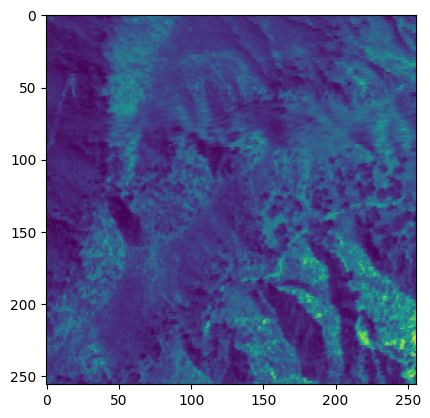

In [7]:
#Let's show specific wavelengths
ind = 16
print(wavelengths[ind])
plt.imshow(hyperspectral_data[ind,:,:])
plt.show()

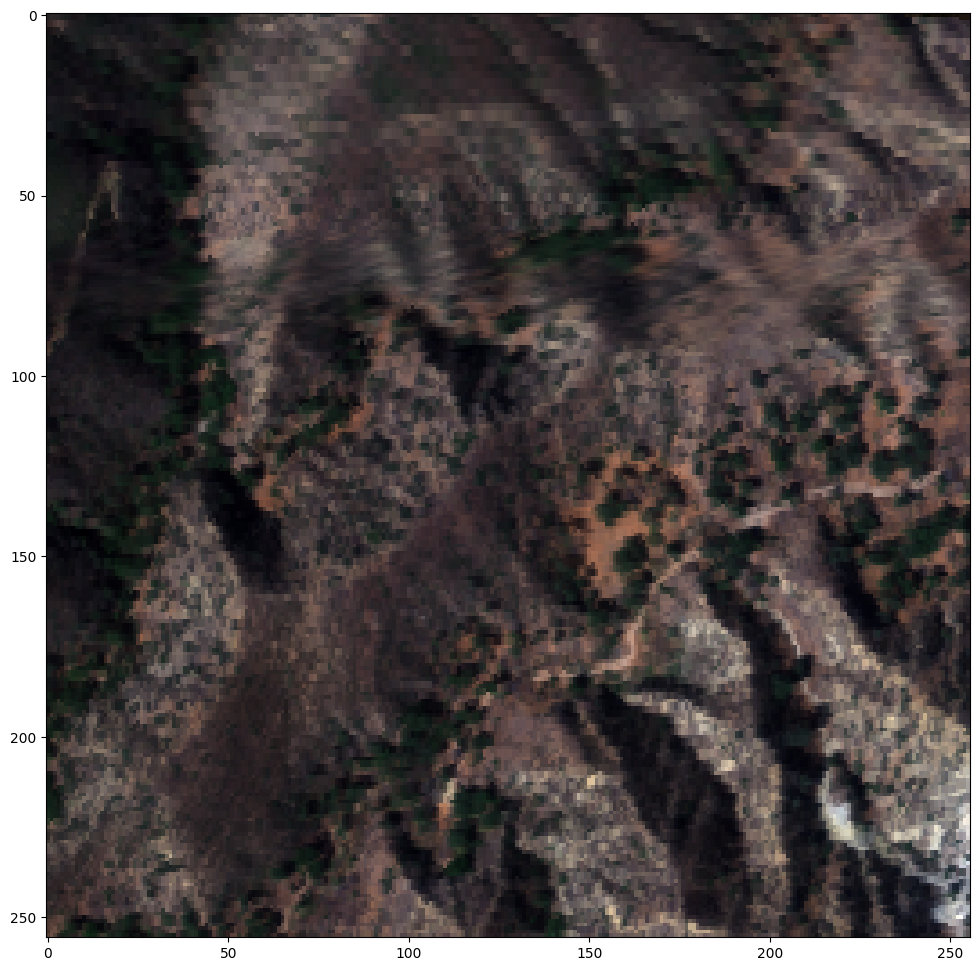

In [10]:
#Let's combine a short, middle and long wavelength
img = np.zeros([header_spectral.shape[0], header_spectral.shape[1], 3], np.float32)

ind1 = wavelengths.index(465.5)
ind2 = wavelengths.index(565.5)
ind3 = wavelengths.index(675.5)
min1 = np.min(hyperspectral_data[ind1,:,:])
min2 = np.min(hyperspectral_data[ind2,:,:])
min3 = np.min(hyperspectral_data[ind3,:,:])
max1 = np.max(hyperspectral_data[ind1,:,:])
max2 = np.max(hyperspectral_data[ind2,:,:])
max3 = np.max(hyperspectral_data[ind3,:,:])

img[:,:,2] = (hyperspectral_data[ind1,:,:]-min1)/(max1 - min1)
img[:,:,1] = (hyperspectral_data[ind2,:,:]-min2)/(max2 - min2)
img[:,:,0] = (hyperspectral_data[ind3,:,:]-min3)/(max3 - min3)
plt.figure(figsize=(12,12))
plt.imshow(img)
plt.show()

## Spectrum vizualisation

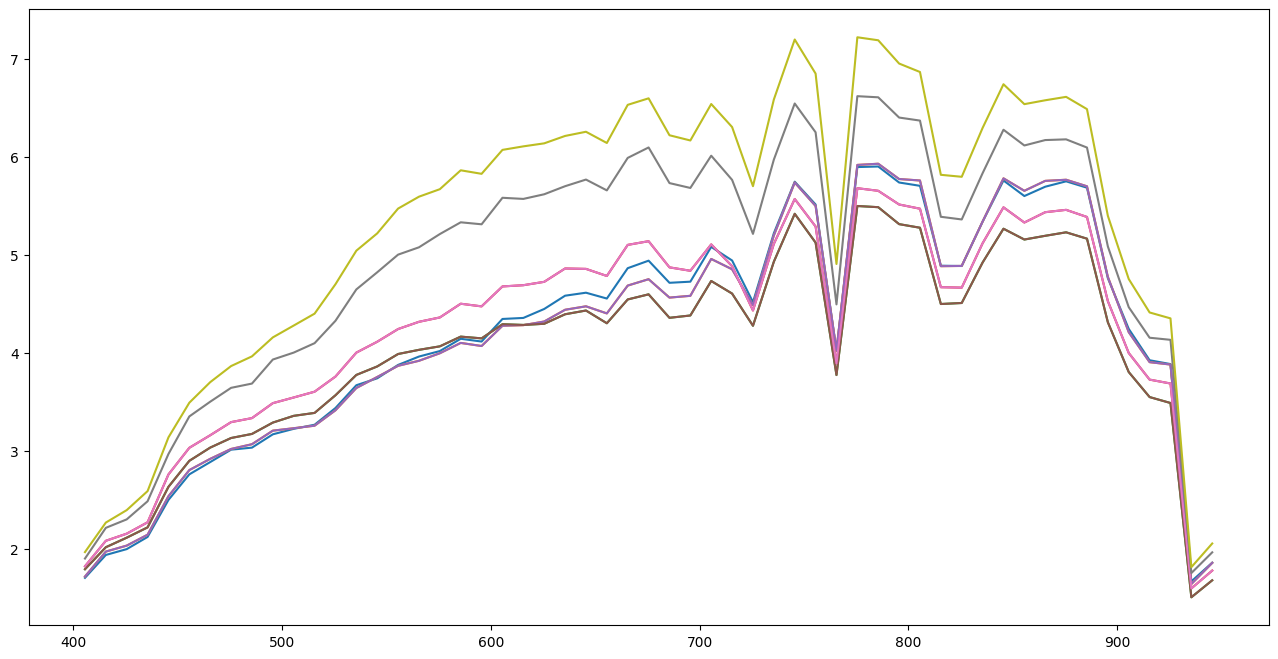

In [11]:
# Plot of 9 spectrums around the same pixels
target_x = 150
target_y = 200

plt.figure(figsize=(16,8))
for i in range (3):
    for j in range(3):
        plt.plot(wavelengths, hyperspectral_data[:,target_x-1+i,target_y-1+j])
plt.show()

## SWIR IMAGES

In [ ]:
# Specify the path to the ENVI data file and the file with .hdr
file = '/mnt/c/data/AVIRIS/GT/ang20160910t181320_rdn_v1n2/SWIR/ang20160910t181320_rdn_v1n2_0000_img_SWIR'
header_file = '/mnt/c/data/AVIRIS/GT/ang20160910t181320_rdn_v1n2/SWIR/ang20160910t181320_rdn_v1n2_0000_img_SWIR.hdr'

# Open the ENVI image using rasterio
with rasterio.open(file) as src:
    # Read the hyperspectral data into a NumPy array
    print("Reading HS data")
    hyperspectral_data = src.read()

    # Display information about the hyperspectral data
    print('Shape of hyperspectral data:', hyperspectral_data.shape)
    print('Number of bands:', src.count)

/root/dev/DTDNML/venv/lib/python3.11/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Reading HS data
Shape of hyperspectral data: (155, 102, 102)
Number of bands: 155


In [15]:
#Open the image with spectral
header_spectral = spectral.open_image(header_file)

# Access the wavelengths associated with each band
wavelengths = header_spectral.bands.centers

# Display information about the hyperspectral data and wavelengths
print('Shape of hyperspectral data:', header_spectral.shape)
print('Number of bands:', header_spectral.shape[2])
print('Wavelengths:', wavelengths)

# [attr for attr in dir(header_spectral) if "__" not in attr]

Shape of hyperspectral data: (102, 102, 155)
Number of bands: 155
Wavelengths: [955.5, 965.5, 975.5, 985.5, 995.5, 1005.5, 1015.5, 1025.5, 1035.5, 1045.5, 1055.5, 1065.5, 1075.5, 1085.5, 1095.5, 1105.5, 1115.5, 1125.5, 1135.5, 1145.5, 1155.5, 1165.5, 1175.5, 1185.5, 1195.5, 1205.5, 1215.5, 1225.5, 1235.5, 1245.5, 1255.5, 1265.5, 1275.5, 1285.5, 1295.5, 1305.5, 1315.5, 1325.5, 1335.5, 1345.5, 1355.5, 1365.5, 1375.5, 1385.5, 1395.5, 1405.5, 1415.5, 1425.5, 1435.5, 1445.5, 1455.5, 1465.5, 1475.5, 1485.5, 1495.5, 1505.5, 1515.5, 1525.5, 1535.5, 1545.5, 1555.5, 1565.5, 1575.5, 1585.5, 1595.5, 1605.5, 1615.5, 1625.5, 1635.5, 1645.5, 1655.5, 1665.5, 1675.5, 1685.5, 1695.5, 1705.5, 1715.5, 1725.5, 1735.5, 1745.5, 1755.5, 1765.5, 1775.5, 1785.5, 1795.5, 1805.5, 1815.5, 1825.5, 1835.5, 1845.5, 1855.5, 1865.5, 1875.5, 1885.5, 1895.5, 1905.5, 1915.5, 1925.5, 1935.5, 1945.5, 1955.5, 1965.5, 1975.5, 1985.5, 1995.5, 2005.5, 2015.5, 2025.5, 2035.5, 2045.5, 2055.5, 2065.5, 2075.5, 2085.5, 2095.5, 2105.

1115.5


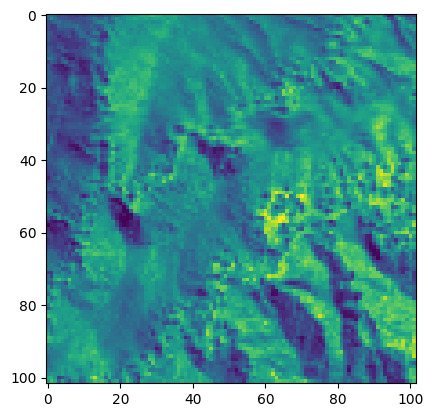

In [ ]:
#Let's show some specific wavelengths
ind = 16
print(wavelengths[ind])
plt.imshow(hyperspectral_data[ind,:,:])
plt.show()

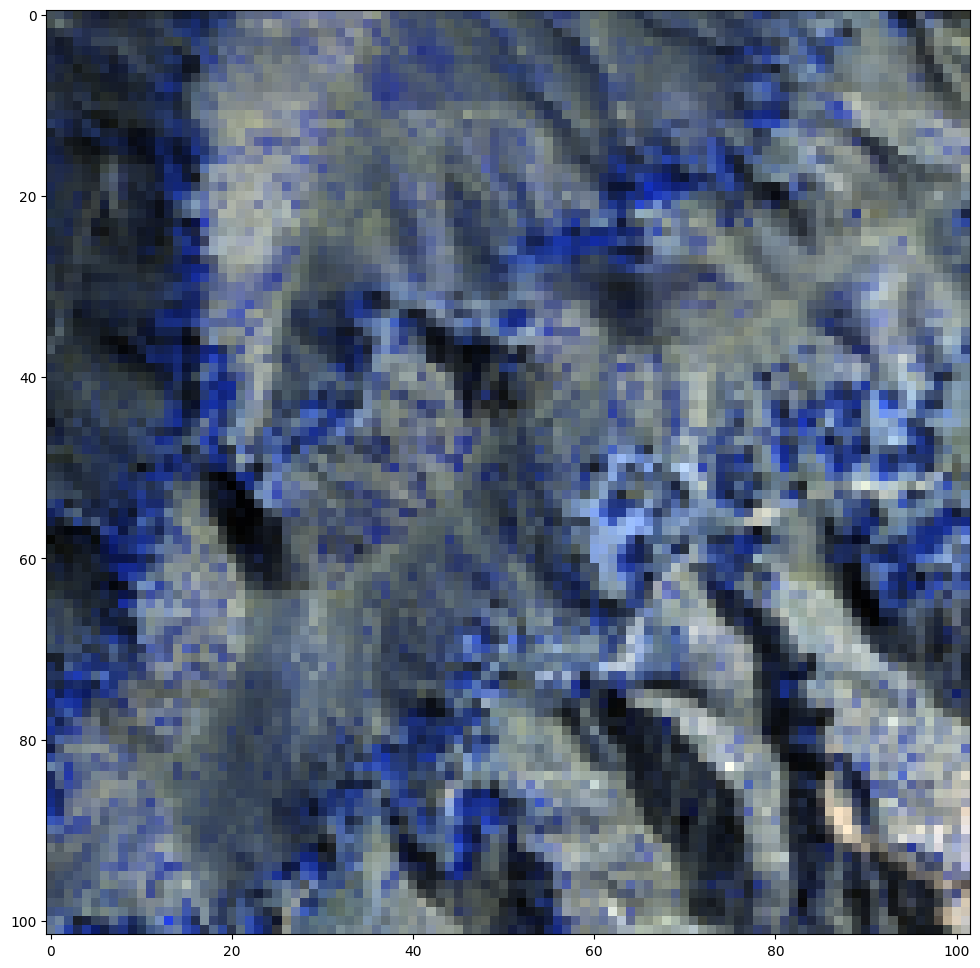

In [17]:
#Let's combine a short, middle and long wavelength
img = np.zeros([header_spectral.shape[0], header_spectral.shape[1], 3], np.float32)

ind1 = wavelengths.index(975.5)
ind2 = wavelengths.index(1525.5)
ind3 = wavelengths.index(2025.5)
min1 = np.min(hyperspectral_data[ind1,:,:])
min2 = np.min(hyperspectral_data[ind2,:,:])
min3 = np.min(hyperspectral_data[ind3,:,:])
max1 = np.max(hyperspectral_data[ind1,:,:])
max2 = np.max(hyperspectral_data[ind2,:,:])
max3 = np.max(hyperspectral_data[ind3,:,:])

img[:,:,2] = (hyperspectral_data[ind1,:,:]-min1)/(max1 - min1)
img[:,:,1] = (hyperspectral_data[ind2,:,:]-min2)/(max2 - min2)
img[:,:,0] = (hyperspectral_data[ind3,:,:]-min3)/(max3 - min3)
plt.figure(figsize=(12,12))
plt.imshow(img)
plt.show()

# San Diego

In [7]:

# Specify the path to the ENVI data file and the file with .hdr
file = '/mnt/c/data/AVIRIS/f111116t01p00r19/f111116t01p00r19rdn_c/f111116t01p00r19rdn_c_sc01_ort_img'
header_file = '/mnt/c/data/AVIRIS/f111116t01p00r19/f111116t01p00r19rdn_c/f111116t01p00r19rdn_c_sc01_ort_img.hdr'

# Open the ENVI image using rasterio
with rasterio.open(file) as src:
    # Read the hyperspectral data into a NumPy array
    print("Reading HS data")
    hyperspectral_data = src.read()

    # Display information about the hyperspectral data
    print('Shape of hyperspectral data:', hyperspectral_data.shape)
    print('Number of bands:', src.count)

Reading HS data
Shape of hyperspectral data: (224, 2799, 1076)
Number of bands: 224


In [28]:

# Specify the path to the ENVI data file and the file with .hdr
file = '/mnt/c/data/AVIRIS/f111116t01p00r22/f111116t01p00r22rdn_c/f111116t01p00r22rdn_c_sc01_ort_img'
header_file = '/mnt/c/data/AVIRIS/f111116t01p00r22/f111116t01p00r22rdn_c/f111116t01p00r22rdn_c_sc01_ort_img.hdr'

# Open the ENVI image using rasterio
with rasterio.open(file) as src:
    # Read the hyperspectral data into a NumPy array
    print("Reading HS data")
    hyperspectral_data = src.read()

    # Display information about the hyperspectral data
    print('Shape of hyperspectral data:', hyperspectral_data.shape)
    print('Number of bands:', src.count)

Reading HS data
Shape of hyperspectral data: (224, 2135, 769)
Number of bands: 224


In [8]:
#Open the image with spectral
header_spectral = spectral.open_image(header_file)

# Access the wavelengths associated with each band
wavelengths = header_spectral.bands.centers

# Display information about the hyperspectral data and wavelengths
print('Shape of hyperspectral data:', header_spectral.shape)
print('Number of bands:', header_spectral.shape[2])
print('Wavelengths:', wavelengths)

Shape of hyperspectral data: (2799, 1076, 224)
Number of bands: 224
Wavelengths: [365.9298, 375.594, 385.2625, 394.9355, 404.6129, 414.2946, 423.9808, 433.6713, 443.3662, 453.0655, 462.7692, 472.4773, 482.1898, 491.9066, 501.6279, 511.3535, 521.0836, 530.818, 540.5568, 550.3, 560.0477, 569.7996, 579.556, 589.3168, 599.0819, 608.8515, 618.6254, 628.4037, 638.1865, 647.9736, 657.7651, 667.561, 655.7923, 665.5994, 675.4012, 685.1979, 694.9894, 704.7756, 714.5566, 724.3325, 734.1031, 743.8685, 753.6287, 763.3837, 773.1335, 782.8781, 792.6174, 802.3516, 812.0805, 821.8043, 831.5228, 841.2361, 850.9442, 860.6471, 870.3448, 880.0372, 889.7245, 899.4066, 909.0834, 918.7551, 928.4214, 938.0827, 947.7387, 957.3895, 967.0351, 976.6755, 986.3106, 995.9406, 1005.565, 1015.185, 1024.799, 1034.408, 1044.012, 1053.611, 1063.204, 1072.793, 1082.376, 1091.954, 1101.526, 1111.094, 1120.656, 1130.213, 1139.765, 1149.311, 1158.853, 1168.389, 1177.92, 1187.446, 1196.966, 1206.482, 1215.992, 1225.497, 1234.9

In [47]:
water_bands = [363, 376, 730, 820, 930, 970, 1200, 1450, 1950, 2500]

def exclude_water(wv: list, wb: list, tol: float) -> list:
    wv_arr = np.array(wv)
    wb_arr = np.array(wb)
    excluded_indices = []
    for i in range(len(wb)):
        excluded_indices.append(np.argwhere(np.abs(wv_arr - wb_arr[i]) < tol).tolist())
        # print(np.abs(wv_arr - wb_arr[i]))
    unique_list = list(set([x[0] for sub in excluded_indices for x in sub]))
    return unique_list


In [58]:
res = exclude_water(wavelengths, water_bands, 10)
mask = np.ones(len(wavelengths), dtype=bool)
mask[res] = False
len(np.array(wavelengths)[mask])


206

# HSI from Satlantis

In [25]:
# Specify the path to the ENVI data file and the file with .hdr
file = '/mnt/c/data/AVIRIS/HS/ang20160910t181320_rdn_v1n2/VNIR/ang20160910t181320_rdn_v1n2_0000_img_HS_VNIR'
header_file = '/mnt/c/data/AVIRIS/HS/ang20160910t181320_rdn_v1n2/VNIR/ang20160910t181320_rdn_v1n2_0000_img_HS_VNIR.hdr'

# Open the ENVI image using rasterio
with rasterio.open(file) as src:
    # Read the hyperspectral data into a NumPy array
    print("Reading HS data")
    hyperspectral_data = src.read()

    # Display information about the hyperspectral data
    print('Shape of hyperspectral data:', hyperspectral_data.shape)
    print('Number of bands:', src.count)

Reading HS data
Shape of hyperspectral data: (55, 17, 17)
Number of bands: 55


## Brouillon

In [53]:
import numpy as np
import os
import xlrd

In [51]:
header_file = 'sandiego/sandiego_ort.hdr'
#Open the image with spectral
header_spectral = spectral.open_image(header_file)

# Access the wavelengths associated with each band
wavelengths = header_spectral.bands.centers

# Display information about the hyperspectral data and wavelengths
print('Shape of hyperspectral data:', header_spectral.shape)
print('Number of bands:', header_spectral.shape[2])
print('Wavelengths:', wavelengths)

Shape of hyperspectral data: (2135, 769, 224)
Number of bands: 224
Wavelengths: [365.9298, 375.594, 385.2625, 394.9355, 404.6129, 414.2946, 423.9808, 433.6713, 443.3662, 453.0655, 462.7692, 472.4773, 482.1898, 491.9066, 501.6279, 511.3535, 521.0836, 530.818, 540.5568, 550.3, 560.0477, 569.7996, 579.556, 589.3168, 599.0819, 608.8515, 618.6254, 628.4037, 638.1865, 647.9736, 657.7651, 667.561, 655.7923, 665.5994, 675.4012, 685.1979, 694.9894, 704.7756, 714.5566, 724.3325, 734.1031, 743.8685, 753.6287, 763.3837, 773.1335, 782.8781, 792.6174, 802.3516, 812.0805, 821.8043, 831.5228, 841.2361, 850.9442, 860.6471, 870.3448, 880.0372, 889.7245, 899.4066, 909.0834, 918.7551, 928.4214, 938.0827, 947.7387, 957.3895, 967.0351, 976.6755, 986.3106, 995.9406, 1005.565, 1015.185, 1024.799, 1034.408, 1044.012, 1053.611, 1063.204, 1072.793, 1082.376, 1091.954, 1101.526, 1111.094, 1120.656, 1130.213, 1139.765, 1149.311, 1158.853, 1168.389, 1177.92, 1187.446, 1196.966, 1206.482, 1215.992, 1225.497, 1234.99

In [70]:
xls_path = os.path.join(os.getcwd(), 'sandiego', 'Landsat8_BGRI_SRF' + '.xls')
print(xls_path)
if not os.path.exists(xls_path):
    raise Exception("Spectral response path does not exist!")
data = xlrd.open_workbook(xls_path)
print(data.sheets())
srf = data.sheets()[0]
# print(np.array(srf.col_values(0)).shape)
# print([np.array(srf.col_values(i)).reshape(-1,1) for i in range(srf.ncols)])
srf_arr = np.array([np.array(srf.col_values(i)).reshape(-1,1) for i in range(srf.ncols)])
srf_arr = np.array([srf.col_values(i) for i in range(srf.ncols)]).T
srf_arr

/root/dev/DTDNML/sandiego/Landsat8_BGRI_SRF.xls
[Sheet  0:<BGRI>]


array([[ 4.36e+02,  1.00e-05,  0.00e+00,  0.00e+00,  0.00e+00],
       [ 4.37e+02,  6.10e-05,  0.00e+00,  0.00e+00,  0.00e+00],
       [ 4.38e+02,  1.17e-04,  0.00e+00,  0.00e+00,  0.00e+00],
       ...,
       [ 8.98e+02,  0.00e+00,  0.00e+00,  0.00e+00, -5.00e-05],
       [ 8.99e+02,  0.00e+00,  0.00e+00,  0.00e+00, -8.40e-05],
       [ 9.00e+02,  0.00e+00,  0.00e+00,  0.00e+00, -1.00e-04]],
      shape=(465, 5))

In [1]:
import torch

In [2]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3070 Ti'